# INTRODUCTION
The dataset provided contain information on different vehicles. It’s expected to determine the price of the vehicles by analysing all the info provided in the dataset. It’s obvious that a car’s price is purely determinants on its present state, value of its part, and other parameters. All these parameters are available on the dataset and with adequate analysis, using powerful data analytic techniques, the price will be estimated. 
It is well known in the “World of Data” that most datasets are not perfect from its source. It always comes with a lot of issues, discrepancies, inconsistencies, and errors that must be checked. This always happens because of how the data is collected or the fault of those inputting them. This vehicle dataset is as such. There are a lot of “Not a Value” fields, confusing inputs, inconsistent values, etc. This is where data cleaning and wrangling comes to play. 
Cleaning of the data will be done carefully to ensure a pure and adequate dataset that will work best for providing a positive outcome. In this notebook, I will be showing the processes, techniques, and tools I have in my disposal for working on the datasets.


In [1]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from xgboost import XGBRegressor, XGBRFRegressor
from catboost import CatBoostRegressor
%matplotlib inline

In [2]:
#import dataset
data=pd.read_csv('vehicles.csv')

In [3]:
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7307730503,https://auburn.craigslist.org/cto/d/opelika-ha...,auburn,https://auburn.craigslist.org,9500,2003.0,chrysler,town & country,excellent,6 cylinders,...,fwd,mid-size,mini-van,blue,https://images.craigslist.org/00w0w_41YO8cHlW3...,2003 Chrysler Town and Country Handicapped Acc...,NaN,al,32.614209,-85.326357
1,7307218858,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,28990,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,...,fwd,NaN,other,white,https://images.craigslist.org/00c0c_kXhBir3Ii6...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000
2,7307164168,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,16590,2013.0,lincoln,mkz sedan 4d,good,NaN,...,fwd,NaN,sedan,red,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000
3,7307164193,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,28990,2017.0,gmc,acadia slt-1 sport utility,good,6 cylinders,...,fwd,NaN,other,NaN,https://images.craigslist.org/00w0w_b3G8mxfApI...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000
4,7307142186,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,20590,2017.0,lincoln,mkz premiere sedan 4d,good,NaN,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00F0F_ghX7UUlnBr...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000


In [4]:
data.shape

(441396, 25)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441396 entries, 0 to 441395
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            441396 non-null  int64  
 1   url           441396 non-null  object 
 2   region        441396 non-null  object 
 3   region_url    441396 non-null  object 
 4   price         441396 non-null  int64  
 5   year          440359 non-null  float64
 6   manufacturer  423019 non-null  object 
 7   model         436057 non-null  object 
 8   condition     257554 non-null  object 
 9   cylinders     253231 non-null  object 
 10  fuel          438515 non-null  object 
 11  odometer      437018 non-null  float64
 12  title_status  432451 non-null  object 
 13  transmission  438769 non-null  object 
 14  VIN           277315 non-null  object 
 15  drive         307747 non-null  object 
 16  size          125812 non-null  object 
 17  type          346047 non-null  object 
 18  pain

In [6]:
data.describe()

,id,price,year,odometer,county,lat,long
count,4.413960e+05,4.413960e+05,440359.000000,4.370180e+05,0.0,434669.000000,434669.000000
mean,7.302968e+09,6.400219e+04,2011.491508,2.252556e+05,NaN,38.474609,-94.567008
std,4.524183e+06,1.109241e+07,9.271752,1.601536e+07,NaN,5.856119,18.237828
min,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-73.081059,-175.319824
25%,7.299673e+09,5.950000e+03,2009.000000,3.942700e+04,NaN,34.429600,-111.800000
50%,7.303986e+09,1.347750e+04,2014.000000,8.500000e+04,NaN,39.157300,-88.167287
75%,7.306984e+09,2.499900e+04,2017.000000,1.310000e+05,NaN,42.354200,-80.832500
max,7.308634e+09,3.736929e+09,2022.000000,2.000799e+09,NaN,84.620231,173.885502


In [7]:
data.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1037
manufacturer     18377
model             5339
condition       183842
cylinders       188165
fuel              2881
odometer          4378
title_status      8945
transmission      2627
VIN             164081
drive           133649
size            315584
type             95349
paint_color     133022
image_url           53
description         56
county          441396
state                0
lat               6727
long              6727
dtype: int64

In [8]:
data.isnull().sum()/len(data)

id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.002349
manufacturer    0.041634
model           0.012096
condition       0.416501
cylinders       0.426295
fuel            0.006527
odometer        0.009919
title_status    0.020265
transmission    0.005952
VIN             0.371732
drive           0.302787
size            0.714968
type            0.216017
paint_color     0.301367
image_url       0.000120
description     0.000127
county          1.000000
state           0.000000
lat             0.015240
long            0.015240
dtype: float64

In [9]:
# Dropping columns that have too many missing values and those that might not impact in the determination of the price
data2 = data.drop(['county', 'VIN', 'drive', 'size', 'paint_color', 'long', 'lat', 'image_url', 'cylinders', 'condition', 'region_url', 'url'], axis = 1)

In [10]:
data2.head()

,id,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,description,state
0,7307730503,auburn,9500,2003.0,chrysler,town & country,gas,30376.0,clean,automatic,mini-van,2003 Chrysler Town and Country Handicapped Acc...,al
1,7307218858,auburn,28990,2018.0,gmc,acadia sle-2 sport utility,gas,20736.0,clean,other,other,Carvana is the safer way to buy a car During t...,al
2,7307164168,auburn,16590,2013.0,lincoln,mkz sedan 4d,gas,61087.0,clean,other,sedan,Carvana is the safer way to buy a car During t...,al
3,7307164193,auburn,28990,2017.0,gmc,acadia slt-1 sport utility,gas,18041.0,clean,other,other,Carvana is the safer way to buy a car During t...,al
4,7307142186,auburn,20590,2017.0,lincoln,mkz premiere sedan 4d,gas,36436.0,clean,other,sedan,Carvana is the safer way to buy a car During t...,al


In [11]:
data2['type'] = data2['type'].fillna('other')

In [12]:
#Descrion of the car won't be important in determining the price of the car
data3 = data2.drop(['description'], axis= 1)

In [13]:
data3.isnull().sum()

id                  0
region              0
price               0
year             1037
manufacturer    18377
model            5339
fuel             2881
odometer         4378
title_status     8945
transmission     2627
type                0
state               0
dtype: int64

In [14]:
data3['transmission'].value_counts()

automatic    357948
other         56114
manual        24707
Name: transmission, dtype: int64

In [15]:
#If we add 'automatic' in the 2000+ missing transmission column, 
#it wont have much impact compaired to when added to other and manual because their value are smaller

data3['transmission'] = data3['transmission'].fillna('atomatic')

In [16]:
data3.head()

,id,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
0,7307730503,auburn,9500,2003.0,chrysler,town & country,gas,30376.0,clean,automatic,mini-van,al
1,7307218858,auburn,28990,2018.0,gmc,acadia sle-2 sport utility,gas,20736.0,clean,other,other,al
2,7307164168,auburn,16590,2013.0,lincoln,mkz sedan 4d,gas,61087.0,clean,other,sedan,al
3,7307164193,auburn,28990,2017.0,gmc,acadia slt-1 sport utility,gas,18041.0,clean,other,other,al
4,7307142186,auburn,20590,2017.0,lincoln,mkz premiere sedan 4d,gas,36436.0,clean,other,sedan,al


In [17]:
data3.isnull().sum()

id                  0
region              0
price               0
year             1037
manufacturer    18377
model            5339
fuel             2881
odometer         4378
title_status     8945
transmission        0
type                0
state               0
dtype: int64

In [18]:
data3['title_status'].value_counts()

clean         418054
rebuilt         7908
salvage         3984
lien            1514
missing          791
parts only       200
Name: title_status, dtype: int64

In [19]:
#If we add 'clean' in the 8000+ missing title_status column, 
#it wont have much impact compaired to when added to others

data3['title_status'] = data3['title_status'].fillna('clean')

In [20]:
data3.isnull().sum()

id                  0
region              0
price               0
year             1037
manufacturer    18377
model            5339
fuel             2881
odometer         4378
title_status        0
transmission        0
type                0
state               0
dtype: int64

In [21]:
data3['odometer'].max()

2000799401.0

In [22]:
data3['odometer'].min()

0.0

In [23]:
data3['odometer'].mean()

225255.58168313434

In [24]:
#fill missing odometer column with the average

data3['odometer'] = data3['odometer'].fillna(data3['odometer'].mean())

In [25]:
data3.isnull().sum()

id                  0
region              0
price               0
year             1037
manufacturer    18377
model            5339
fuel             2881
odometer            0
title_status        0
transmission        0
type                0
state               0
dtype: int64

In [26]:
data3['fuel'].value_counts()

gas         367217
other        33406
diesel       30728
hybrid        5358
electric      1806
Name: fuel, dtype: int64

In [27]:
#If we add 'gas' in the 2000+ missing fuel column, 
#it wont have much impact compaired to when added to others

data3['fuel'] = data3['fuel'].fillna('gas')

In [28]:
data3.isnull().sum()

id                  0
region              0
price               0
year             1037
manufacturer    18377
model            5339
fuel                0
odometer            0
title_status        0
transmission        0
type                0
state               0
dtype: int64

In [29]:
data3['model'].value_counts()

f-150                            8006
silverado 1500                   5466
1500                             4310
camry                            3345
accord                           3269
                                 ... 
quest 4dr le                        1
corvette coup                       1
benz glk-350 with 41000 miles       1
Maxda Tribute                       1
aveo5 lt                            1
Name: model, Length: 30082, dtype: int64

In [30]:
#If we add 'f-150' in the 8000+ missing model column, 
#it wont have much impact compaired to when added to others

data3['model'] = data3['model'].fillna('f-150')

In [31]:
data3.isnull().sum()

id                  0
region              0
price               0
year             1037
manufacturer    18377
model               0
fuel                0
odometer            0
title_status        0
transmission        0
type                0
state               0
dtype: int64

In [32]:
data3['year'].value_counts()

2018.0    38411
2017.0    36799
2015.0    33075
2013.0    32130
2014.0    31985
          ...  
1920.0        2
1919.0        2
1918.0        2
1917.0        1
1901.0        1
Name: year, Length: 110, dtype: int64

In [33]:
#If we add 2018 in the 1000+ missing year column, 
#it wont have much impact compaired to when added to others

data3['year'] = data3['year'].fillna(2018)

In [34]:
data3.isnull().sum()

id                  0
region              0
price               0
year                0
manufacturer    18377
model               0
fuel                0
odometer            0
title_status        0
transmission        0
type                0
state               0
dtype: int64

In [35]:
data3['manufacturer'].value_counts()

ford               70467
chevrolet          56172
toyota             35508
honda              22066
nissan             20072
jeep               19517
ram                18335
gmc                16420
bmw                15900
dodge              13972
mercedes-benz      12680
hyundai            11448
volkswagen          9601
subaru              9419
lexus               9383
kia                 8929
audi                8018
cadillac            7374
chrysler            6607
acura               6382
infiniti            5772
buick               5747
lincoln             5201
mazda               5000
mitsubishi          3751
volvo               3498
pontiac             2453
rover               2348
jaguar              2308
mini                2304
porsche             1303
mercury             1172
alfa-romeo          1148
saturn               986
tesla                736
fiat                 711
harley-davidson      110
ferrari               92
datsun                53
land rover            27


In [36]:
#If we add ford in the 1000+ missing manufacturer column, 
#it wont have much impact compaired to when added to others

data3['manufacturer'] = data3['manufacturer'].fillna('ford')

In [37]:
data3.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
type            0
state           0
dtype: int64

In [38]:
data3.head()

,id,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
0,7307730503,auburn,9500,2003.0,chrysler,town & country,gas,30376.0,clean,automatic,mini-van,al
1,7307218858,auburn,28990,2018.0,gmc,acadia sle-2 sport utility,gas,20736.0,clean,other,other,al
2,7307164168,auburn,16590,2013.0,lincoln,mkz sedan 4d,gas,61087.0,clean,other,sedan,al
3,7307164193,auburn,28990,2017.0,gmc,acadia slt-1 sport utility,gas,18041.0,clean,other,other,al
4,7307142186,auburn,20590,2017.0,lincoln,mkz premiere sedan 4d,gas,36436.0,clean,other,sedan,al


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'odometer'}>]], dtype=object)

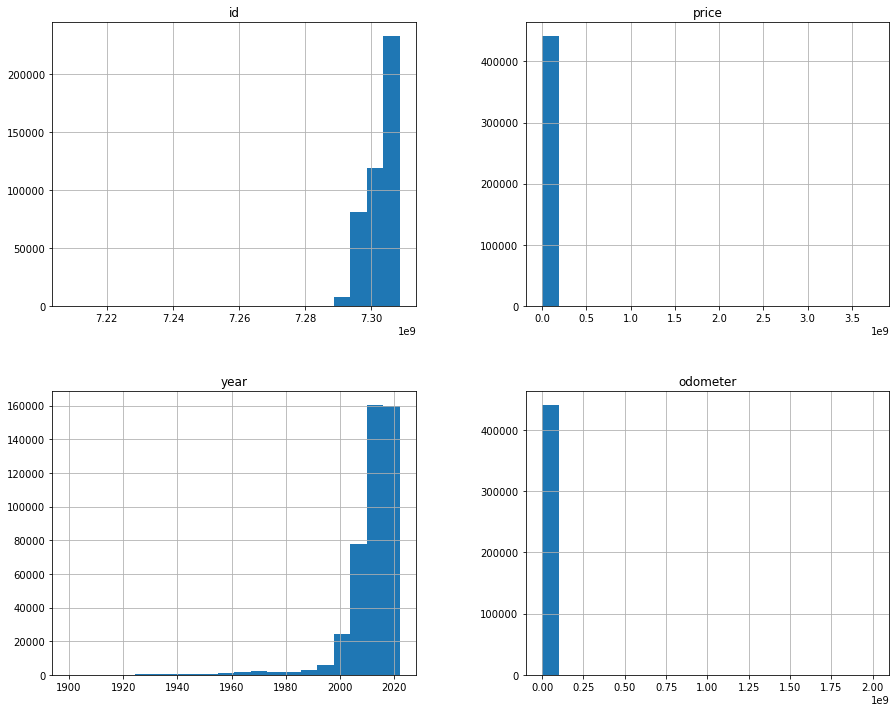

In [39]:
data3.hist(figsize=(15,12), bins=20)

In [40]:
def get_num_cols(data3):
    num_cols = [col for col in data3.columns if pd.api.types.is_numeric_dtype(data3[col])]
    return num_cols

def clear_outliers(data3):
    for col in get_num_cols(data3):
        Q1 = np.percentile(data3[col], 25)
        Q3 = np.percentile(data3[col],75)

        # Interquartile range
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR

        # Outliers indices
        outliers_indicies = data3[(data3[col] < Q1 - outlier_step) | (data3[col] > Q3 + outlier_step )].index
        data.drop(outliers_indicies, axis = 0)
    
    return data3
    
clear_outliers(data3)

,id,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
0,7307730503,auburn,9500,2003.0,chrysler,town & country,gas,30376.0,clean,automatic,mini-van,al
1,7307218858,auburn,28990,2018.0,gmc,acadia sle-2 sport utility,gas,20736.0,clean,other,other,al
2,7307164168,auburn,16590,2013.0,lincoln,mkz sedan 4d,gas,61087.0,clean,other,sedan,al
3,7307164193,auburn,28990,2017.0,gmc,acadia slt-1 sport utility,gas,18041.0,clean,other,other,al
4,7307142186,auburn,20590,2017.0,lincoln,mkz premiere sedan 4d,gas,36436.0,clean,other,sedan,al
...,...,...,...,...,...,...,...,...,...,...,...,...
441391,7293621541,wyoming,23590,2017.0,infiniti,qx50 sport utility 4d,gas,25738.0,clean,automatic,hatchback,wy
441392,7293621536,wyoming,16990,2017.0,buick,regal sport touring sedan,gas,36688.0,clean,other,sedan,wy
441393,7293621577,wyoming,21590,2013.0,bmw,5 series 535i sedan 4d,other,44366.0,clean,automatic,sedan,wy
441394,7293621534,wyoming,26990,2016.0,bmw,4 series 435i gran coupe 4d,other,43934.0,clean,other,coupe,wy


In [41]:
le = LabelEncoder()

In [42]:
data3[['region','manufacturer','model','fuel',
        'title_status','transmission','type',
        'state']] = data3[['region','manufacturer','model',
        'fuel','title_status','transmission',
        'type','state']].apply(le.fit_transform)

In [43]:
data3

,id,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
0,7307730503,16,9500,2003.0,8,27604,2,30376.0,0,1,5,1
1,7307218858,16,28990,2018.0,14,7834,2,20736.0,0,3,7,1
2,7307164168,16,16590,2013.0,24,20478,2,61087.0,0,3,9,1
3,7307164193,16,28990,2017.0,14,7850,2,18041.0,0,3,7,1
4,7307142186,16,20590,2017.0,24,20467,2,36436.0,0,3,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
441391,7293621541,397,23590,2017.0,18,22773,2,25738.0,0,1,4,50
441392,7293621536,397,16990,2017.0,5,23302,2,36688.0,0,3,9,50
441393,7293621577,397,21590,2013.0,4,3389,4,44366.0,0,1,9,50
441394,7293621534,397,26990,2016.0,4,3105,4,43934.0,0,3,3,50


In [44]:
# selecting features, X
X = data3.iloc[:, :-1].values
# selecting labels, y
y = data3.iloc[:, -1].values

In [45]:
# normalize the data
X = StandardScaler().fit_transform(X.astype(float))

In [46]:
# to split the data
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (353116, 11) (353116,)
Test set:  (88280, 11) (88280,)


In [47]:
# to create the linear reg model
reg = LinearRegression()
reg.fit(X_train, y_train)  # fit the model to train set

LinearRegression()

In [48]:
# to evaluate test set values
y_pred = reg.predict(X_test)

In [49]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_pred), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_pred), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
print('R2 score: ', round(r2_score(y_test, y_pred), 3))

Mean Absolute Error:  13.569
Mean Squared Error:  230.166
Root Mean Squared Error:  15.171
R2 score:  0.007


In [50]:
r = ExtraTreesRegressor(n_estimators=400, random_state=42)
r.fit(X_train, y_train.ravel())

ExtraTreesRegressor(n_estimators=400, random_state=42)

In [51]:
y_predET = r.predict(X_test)

In [52]:
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, y_predET), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, y_predET), 3))
print('Root Mean Squared Error: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_predET)), 3))
print('R2 score: ', round(r2_score(y_test, y_predET), 3))

Mean Absolute Error:  0.714
Mean Squared Error:  3.596
Root Mean Squared Error:  1.896
R2 score:  0.984
